# Forest Plots

> Explanation of how to use forest_plot for contrast objects e.g delta-delta and mini-meta or regular deltas.

- order: 7

In DABEST **v2025.03.27**, we introduce a new function to plot separately calculated effect sizes in the same axes to allow direct visual comparisons. 

Currently you can make a forest plot for delta-delta, mini-meta, or standard delta effect sizes. In addition, for delta-delta and mini-meta experiments, you can also plot the effect sizes of the original comparisons alongside the delta-delta/mini-meta measurement.

## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest
import matplotlib.pyplot as plt
import dabest 
print("We're using DABEST v{}".format(dabest.__version__))

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 20.35it/s]

Numba compilation complete!
We're using DABEST v2025.03.27


## Delta-delta effects

First please revisit the notebook [Delta-Delta Tutorial](06-delta_delta.html) for how to generate a delta-delta effect size. We will generate three of them plot them into the same axes. Here we test the efficacy of 3 drugs named ``Drug1``, ``Drug2`` , and ``Drug3`` on a disease-causing mutation ```M``` based on disease metric ```Tumor Size```.  We want to know how the three drugs fare in ameliorating the phenotype metric ```Tumor Size```. 

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug1  | X<sub>D<sub>1, W</sub> | X<sub>D<sub>1, M</sub> |
| Placebo | X<sub>P<sub>1, W</sub> | X<sub>P<sub>1, M</sub> |

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug2  | X<sub>D<sub>2, W</sub> | X<sub>D<sub>2, M</sub> |
| Placebo | X<sub>P<sub>2, W</sub> | X<sub>P<sub>2, M</sub> |

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug3  | X<sub>D<sub>3, W</sub> | X<sub>D<sub>3, M</sub> |
| Placebo | X<sub>P<sub>3, W</sub> | X<sub>P<sub>3, M</sub> |

In each scenario, there are two ``Treatment`` conditions, ``Placebo`` (control group) and ``Drug`` (test group). There are two ``Genotype``\'s: ``W`` (wild type population) and ``M`` (mutant population). Additionally, each experiment was conducted twice (``Rep1`` and ``Rep2``). We will perform several analyses to visualise these differences in a simulated dataset. We will simulate three separte datasets below. 

### Creating a demo dataset

In [ ]:
from scipy.stats import norm
def create_delta_dataset(N=20, 
                        seed=9999, 
                        second_quarter_adjustment=3, 
                        third_quarter_adjustment=-0.1):
    np.random.seed(seed)  # Set the seed for reproducibility

    # Create samples
    y = norm.rvs(loc=3, scale=0.4, size=N*4)
    y[N:2*N] += second_quarter_adjustment
    y[2*N:3*N] += third_quarter_adjustment

    # Treatment, Rep, Genotype, and ID columns
    treatment = np.repeat(['Placebo', 'Drug'], N*2).tolist()
    rep = ['Rep1', 'Rep2'] * (N*2)
    genotype = np.repeat(['W', 'M', 'W', 'M'], N).tolist()
    id_col = list(range(0, N*2)) * 2

    # Combine all columns into a DataFrame
    df = pd.DataFrame({
        'ID': id_col,
        'Rep': rep,
        'Genotype': genotype,
        'Treatment': treatment,
        'Tumor Size': y
    })

    return df

# Generate the first dataset with a different seed and adjustments
df_delta2_drug1 = create_delta_dataset(seed=9999, second_quarter_adjustment=1, third_quarter_adjustment=-0.5)

# Generate the second dataset with a different seed and adjustments
df_delta2_drug2 = create_delta_dataset(seed=9999, second_quarter_adjustment=0.1, third_quarter_adjustment=-1)

# Generate the third dataset with the same seed as the first but different adjustments
df_delta2_drug3 = create_delta_dataset(seed=9999, second_quarter_adjustment=3, third_quarter_adjustment=-0.1)

### Loading data

In [ ]:
unpaired_delta_01 = dabest.load(data = df_delta2_drug1, 
                                x = ["Genotype", "Genotype"], 
                                y = "Tumor Size", delta2 = True, 
                                experiment = "Treatment")
unpaired_delta_02 = dabest.load(data = df_delta2_drug2, 
                                x = ["Genotype", "Genotype"], 
                                y = "Tumor Size", delta2 = True, 
                                experiment = "Treatment")
unpaired_delta_03 = dabest.load(data = df_delta2_drug3, 
                                x = ["Genotype", "Genotype"], 
                                y = "Tumor Size", 
                                delta2 = True, 
                                experiment = "Treatment")
contrasts = [unpaired_delta_01, unpaired_delta_02, unpaired_delta_03]

### Generate delta-delta plots for each datasets 

To create a delta-delta plot, you simply need to set ``delta2=True`` in the 
``dabest.load()`` function and ``mean_diff.plot()``

In this case,``x`` needs to be declared as a list consisting of 2 elements, unlike most cases where it is a single element. 
The first element in ``x`` will represent the variable plotted along the horizontal axis, and the second one will determine the 
color of dots for scattered plots or the color of lines for slope graphs. We use the ``experiment`` input to specify the grouping of the data.

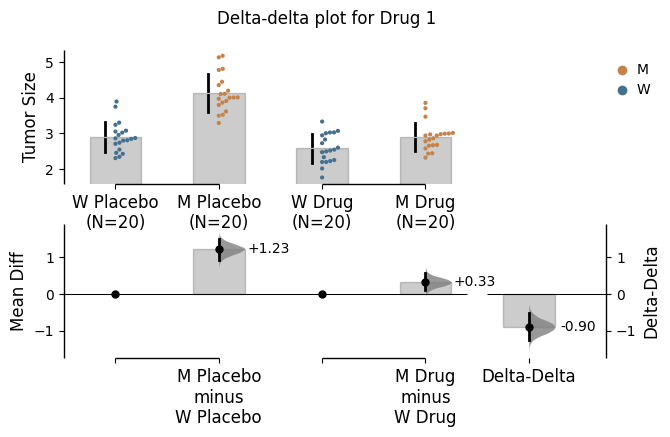

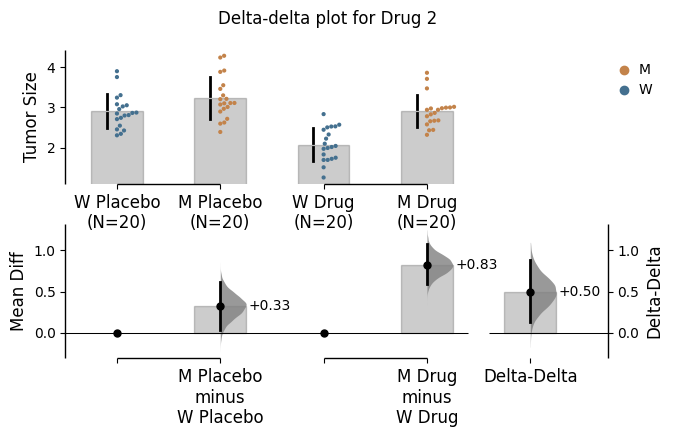

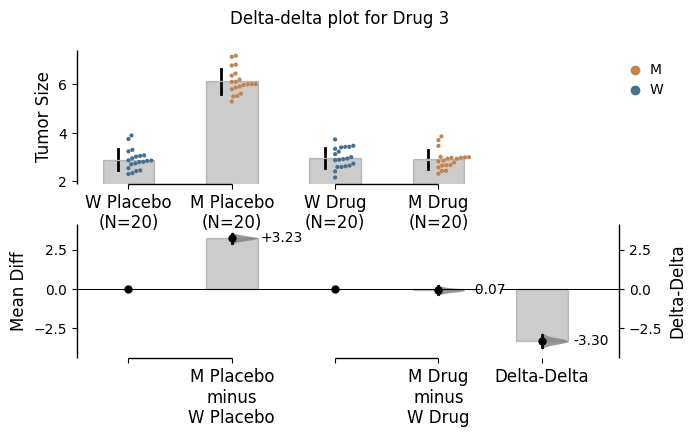

In [ ]:

f1 = unpaired_delta_01.mean_diff.plot(
    contrast_label='Mean Diff',
    fig_size = (7, 4),
    raw_marker_size = 1,
    contrast_marker_size = 5,
);
f1.suptitle('Delta-delta plot for Drug 1');


f2 = unpaired_delta_02.mean_diff.plot(                  
            contrast_label='Mean Diff',
            fig_size = (7, 4),
            raw_marker_size = 1,
            contrast_marker_size = 5,
);
f2.suptitle('Delta-delta plot for Drug 2');


f3 = unpaired_delta_03.mean_diff.plot(                  
                    contrast_label='Mean Diff',
                    fig_size = (7, 4),
                    raw_marker_size = 1,
                    contrast_marker_size = 5,
);
f3.suptitle('Delta-delta plot for Drug 3');


### Generate a forest plot

This will allow for comparisons of different ``Drug`` effects.

Key Parameters:

- ``data``: A list of dabest objects 

- ``labels``: A list of labels for the dabest objects. E.g., ``['Drug1', 'Drug2', 'Drug3']``

- ``effect_size``: For delta-delta experiments, you can select the effect size metric from ``"mean_diff", or "hedges_g" / "delta_g"``. The default is ``"mean_diff"``.

- ``ci_type``: A string specifying the confidence interval type to use. The options are either `bca` or `pct`. Default is `bca`.
  
 **Note: "hedges_g" and "delta_g" can be used interchangeably for delta-delta experiments - both plot hedges_g regular effect sizes and our `Delta g` delta-delta effect size.**

- ``horizontal``: A boolean input (``True``/ ``False``) to adjust the plot orientation. The default is vertical orientation (``False``) 

- ``ax``: Optional argument to specify an existing matplotlib axes (otherwise a standalone figure will be created) 

See the [Controlling aesthetics](#controlling-aesthetics) section for more information on how to alter the aesthetics of the plots.


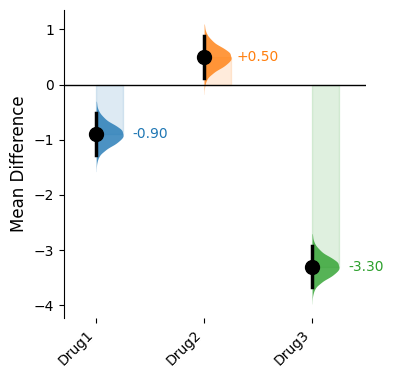

In [ ]:
f_forest_delta2 = dabest.forest_plot(
                        data = contrasts, 
                        labels = ['Drug1', 'Drug2', 'Drug3']
);

### Generate a forest plot with delta effect sizes alongside the delta-delta effect sizes

If you want to plot the original effect sizes alongside the delta-delta effect sizes, you can do so by utilising the `idx` parameter. This parameter takes a tuple/list of indices of the original effect sizes you want to plot. 

For example, if you want to plot only the first effect size and the delta-delta effect size for each of the three dabest object supplied, you can do so by setting `idx=[[0, 2],[0, 2],[0, 2]]`.

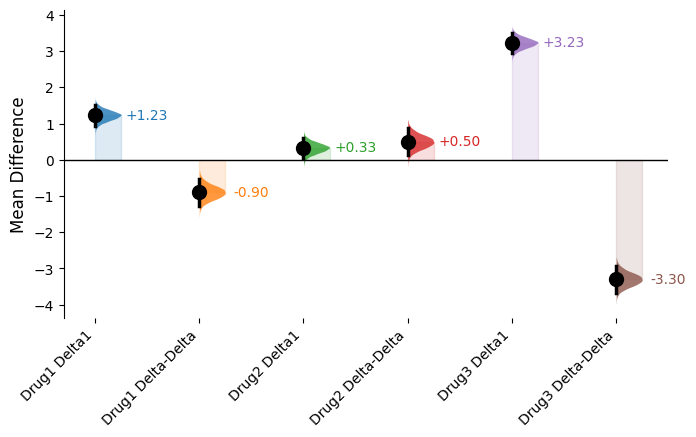

In [ ]:
f_forest_delta2 = dabest.forest_plot(
                        data = contrasts, 
                        labels = ['Drug1 Delta1', 'Drug1 Delta-Delta', 'Drug2 Delta1', 'Drug2 Delta-Delta', 'Drug3 Delta1', 'Drug3 Delta-Delta'],
                        idx=[[0, 2], [0, 2], [0, 2]]
);

### Selecting normalised effect sizes via `hedges_g` or `delta_g`

Remember, `hedges_g` and `delta_g` are interchangeable for delta-delta experiments. However, when plotting the original effect sizes alongside the delta-delta effect sizes, you should note that hedges_g effect sizes will be plotted alongside the Delta g effect sizes. 

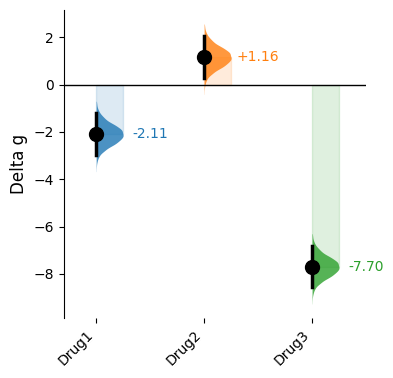

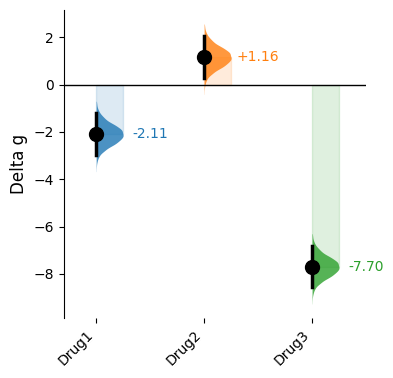

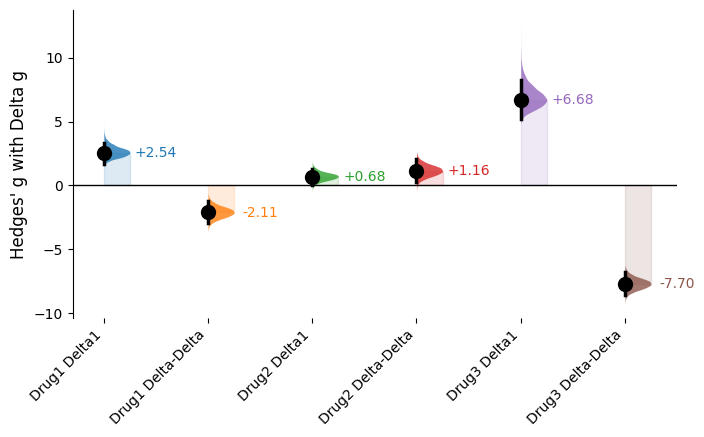

In [ ]:
f_forest_delta2 = dabest.forest_plot(
                            data = contrasts, 
                            labels = ['Drug1', 'Drug2', 'Drug3'],
                            effect_size='hedges_g');
f_forest_delta2 = dabest.forest_plot(
                            data = contrasts, 
                            labels = ['Drug1', 'Drug2', 'Drug3'],
                            effect_size='delta_g');

f_forest_delta2 = dabest.forest_plot(
                            data = contrasts, 
                            labels = ['Drug1 Delta1', 'Drug1 Delta-Delta', 'Drug2 Delta1', 'Drug2 Delta-Delta', 'Drug3 Delta1', 'Drug3 Delta-Delta'],
                            effect_size='hedges_g',
                            idx=[[0, 2], [0, 2], [0, 2]]);

## Mini-meta effects
Next we will generate a similar forest plot for mini-meta effect sizes. Please revisit the notebook [Mini-Meta Tutorial](05-mini_meta.html) on how to generate a mini-meta effect size. We will generate three mini-meta effect sizes for three separate mini-meta analyses:

**Note: the only effect size metric currently available for mini-meta is ``"mean_diff"``.**

### Creating a demo dataset

In [ ]:
def create_mini_meta_dataset(N=20, seed=9999, control_locs=[3, 3.5, 3.25], control_scales=[0.4, 0.75, 0.4], 
                             test_locs=[3.5, 2.5, 3], test_scales=[0.5, 0.6, 0.75]):
    np.random.seed(seed)  # Set the seed for reproducibility

    # Create samples for controls and tests
    controls_tests = []
    for loc, scale in zip(control_locs + test_locs, control_scales + test_scales):
        controls_tests.append(norm.rvs(loc=loc, scale=scale, size=N))

    # Add a `Gender` column for coloring the data
    gender = ['Female'] * (N // 2) + ['Male'] * (N // 2)

    # Add an `ID` column for paired data plotting
    id_col = list(range(1, N + 1))

    # Combine samples and gender into a DataFrame
    df_columns = {f'Control {i+1}': controls_tests[i] for i in range(len(control_locs))}
    df_columns.update({f'Test {i+1}': controls_tests[i + len(control_locs)] for i in range(len(test_locs))})
    df_columns['Gender'] = gender
    df_columns['ID'] = id_col

    df = pd.DataFrame(df_columns)

    return df

# Customizable dataset creation with different arguments
df_mini_meta01 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[3, 3.5, 3.25], 
                                          control_scales=[0.4, 0.75, 0.4], 
                                          test_locs=[3.5, 2.5, 3], 
                                          test_scales=[0.5, 0.6, 0.75])

df_mini_meta02 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[4, 2, 3.25], 
                                          control_scales=[0.3, 0.75, 0.45], 
                                          test_locs=[2, 1.5, 2.75], 
                                          test_scales=[0.5, 0.6, 0.4])

df_mini_meta03 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[6, 5.5, 4.25], 
                                          control_scales=[0.4, 0.75, 0.45], 
                                          test_locs=[4.5, 3.5, 3], 
                                          test_scales=[0.5, 0.6, 0.9])

### Loading data

In [ ]:
contrast_mini_meta01 = dabest.load(data = df_mini_meta01,
                                   idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), 
                                   mini_meta=True)
contrast_mini_meta02 = dabest.load(data = df_mini_meta02,
                                    idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), 
                                    mini_meta=True)
contrast_mini_meta03 = dabest.load(data = df_mini_meta03,
                                   idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")),
                                    mini_meta=True)
contrasts_mini_meta = [contrast_mini_meta01, contrast_mini_meta02, contrast_mini_meta03]    
                              

### Generate a forest plot

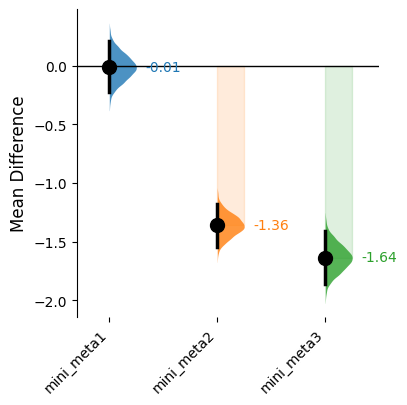

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                            data = contrasts_mini_meta, 
                            labels=['mini_meta1', 'mini_meta2', 'mini_meta3']
);

### Generate a forest plot with delta effect sizes alongside the mini-meta effect sizes

If you want to plot the original effect sizes alongside the mini-meta effect sizes, you can do so by utilising the `idx` parameter. This parameter takes a tuple/list of indices of the original effect sizes you want to plot.  

For example, if you want to plot only the first effect size and the mini-meta effect size for each of the three dabest object supplied, you can do so by setting `idx=[[0, final_idx],[0, final_idx],[0, final_idx]]` (where `final_idx` is the index of the last contrast object which will be the  mini-meta effect size.)

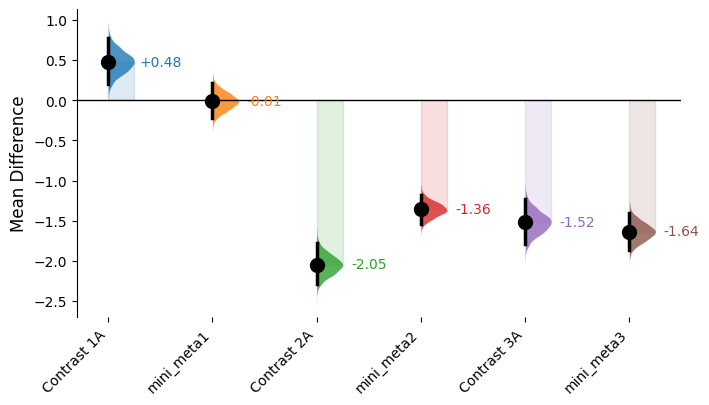

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        idx = [[0, 3],[0, 3], [0, 3]],
                        labels=['Contrast 1A', 'mini_meta1', 'Contrast 2A', 'mini_meta2', 'Contrast 3A', 'mini_meta3']
);

## Delta effects
Next we will generate a similar forest plot of regular delta effect sizes. In the example below, we will generate three regular `mean_diff` experiments. Here, we will only plot the effect size between the first group (Test 1 - Control 1) for each of the three dabest object supplied.

In [ ]:
delta1 = dabest.load(data = df_mini_meta01,
                                   idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")))
delta2 = dabest.load(data = df_mini_meta02,
                                    idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")))
delta3 = dabest.load(data = df_mini_meta03,
                                   idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")))
contrasts_deltas = [delta1, delta2, delta3]         

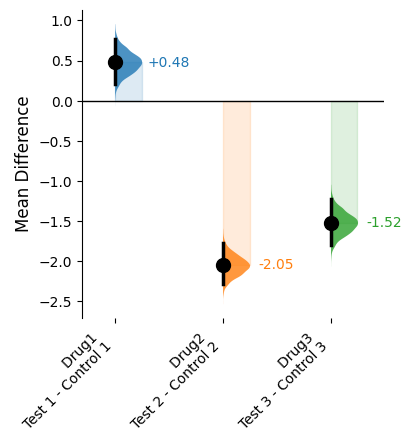

In [ ]:
dabest.forest_plot(contrasts_deltas, idx=((0,),(0,), (0,)), 
            labels=['Drug1 \nTest 1 - Control 1', 'Drug2 \nTest 2 - Control 2', 'Drug3 \nTest 3 - Control 3']);

Unlike delta-delta and mini-meta experiments, here you can choose between more effect size metrics (where applicable): `mean_diff`, `cohens_d`, `cohens_h`, `hedges_g`, and `cliffs_delta`

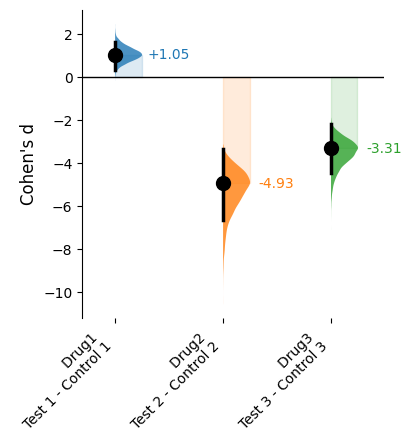

In [ ]:
dabest.forest_plot(contrasts_deltas, idx=((0,),(0,), (0,)), effect_size = 'cohens_d',
            labels=['Drug1 \nTest 1 - Control 1', 'Drug2 \nTest 2 - Control 2', 'Drug3 \nTest 3 - Control 3']);

## Controlling aesthetics

The main aesthetic parameters for the forest_plot function are:

- `fig_size`: The size of the figure

- ``horizontal``: A boolean input (``True``/ ``False``) to adjust the plot orientation. The default is vertical orientation (``False``) 

- `custom_palette`: A list or dictionary of colors, one for each contrast object. E.g., `['gray', 'blue', 'green']` or `{'Drug1':'gray', 'Drug2':'blue', 'Drug3':'green'}` or a set of colors from seaborn color palettes.

- `marker_size`: The size of the markers for the effect sizes. The default is 10.

- `contrast_alpha`: Transparency level for violin plots. The default is 0.8.

- `contrast_desat`: Saturation level for violin plots. The default is 1.

- `labels_rotation`: Rotation angle for contrast labels. The default is 45 (for `horizontal=False`).

- `labels_fontsize`: Font size for contrast labels. The default is 10.

- `title`: The plot title. The default is None.

- `title_fontsize`: Font size for the plot title. The default is 16.

- `ylabel`: The axis label of dependent variable (Y-axis for vertical layout, X-axis for horizontal layout). The default will be given via the effect size selected. (eg., `"Mean Difference"` for `"mean_diff"`)

- `ylabel_fontsize`: Font size for the axis label (Y-axis for vertical layout, X-axis for horizontal layout). The default is 12.

- `ylim`: Limits for the dependent variable (Y-axis for vertical layout, X-axis for horizontal layout). The default is None.

- `yticks`: Custom ticks (Y-axis for vertical layout, X-axis for horizontal layout) for the plot. The default is None.

- `yticklabels`: Custom tick labels (Y-axis for vertical layout, X-axis for horizontal layout) for the plot. The default is None.

- `remove_spines`: If True, removes plot spines (except the relevant dependent variable spine). The default is True.

- `violin_kwargs`: A dictionary of keyword arguments for the violin plots. 
  
        The default violin_kwargs = {"widths": 0.5, "showextrema": False, "showmedians": False, "vert": not horizontal}

- `zeroline_kwargs`: A dictionary of keyword arguments for the zero line. The default is None.
  
        The default zeroline_kwargs = {"linewidth": 1, "color": "black"}

- `marker_kwargs`: A dictionary of keyword arguments for the effect size markers. The default is None.
  
        The default marker_kwargs = {'marker': 'o', 'markersize': 12, 'color': 'black', 'alpha': 1, 'zorder': 2}

- `errorbar_kwargs`: A dictionary of keyword arguments for the effect size error bars. The default is None.
  
        The default errorbar_kwargs = {'color': 'black', 'lw': 2.5, 'linestyle': '-', 'alpha': 1, 'zorder': 1}

### Changing layout with `horizontal`
Forest plot assumes a vertical layout by default, but you can change it to a horizontal layout by setting ```horizontal``` to be ```True```:

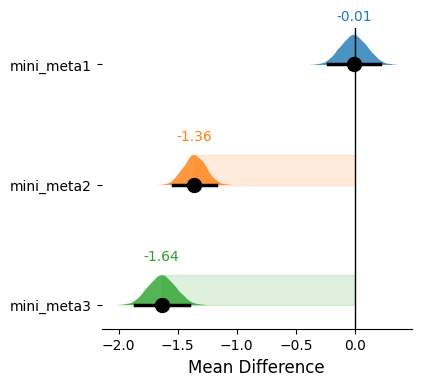

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        labels=['mini_meta1', 'mini_meta2', 'mini_meta3'],
                        horizontal=True,)

### Using a custom palette 
You can color the half-violins with ```custom_palette```:

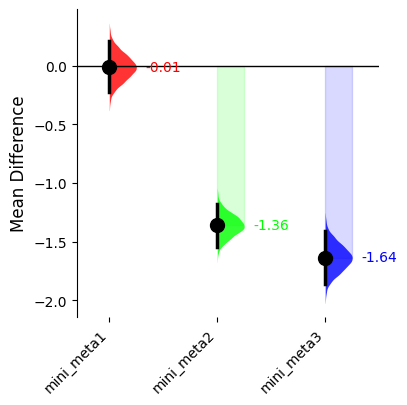

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        labels=['mini_meta1', 'mini_meta2', 'mini_meta3'],
                        custom_palette=['#FF0000', '#00FF00', '#0000FF'],)

### Plotting other effect sizes 
Forest plots can be drawn for effect sizes other than mean_difference, such as `hedges_g`, by setting `effect_size`:

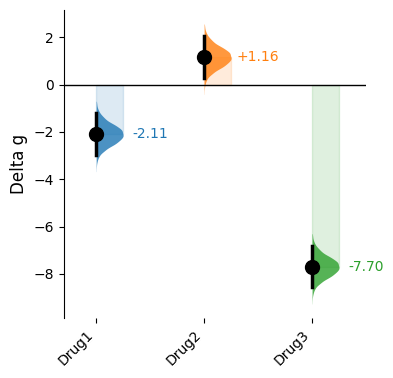

In [ ]:
f_forest_hedgesg = dabest.forest_plot(
                            data = contrasts, 
                            labels =['Drug1', 'Drug2', 'Drug3'], 
                            effect_size='hedges_g',
);

### Delta text
You can add/remove delta text via the `delta_text` argument. It is on by default.

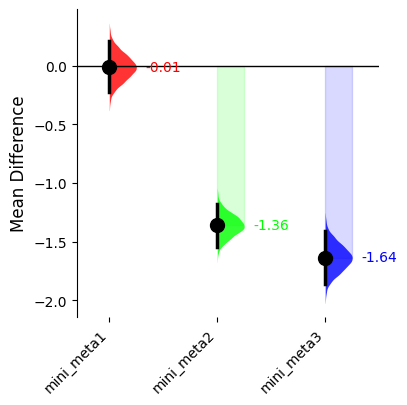

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        labels=['mini_meta1', 'mini_meta2', 'mini_meta3'],
                        custom_palette=['#FF0000', '#00FF00', '#0000FF'],
                        delta_text=True)

You can set a variety of kwargs to customize the delta text via `delta_text_kwargs`.

The relevant inputs to `delta_text_kwargs` are:

- `'color'` - Color. If color is not specified, the color of the effect size curve will be used. 
- `'alpha'`- Alpha (transparency)
- `'fontsize'` - Font size
- `'ha'` - Horizontal alignment
- `'va'` - Vertical alignment 
- `'rotation'` - Text rotation
- `'x_coordinates'` - Specify the x-coordinates of the text
- `'y_coordinates'` - Specify the y-coordinates of the text
- `'offset'` - Am x-axis coordinate adjuster for minor movement of all text


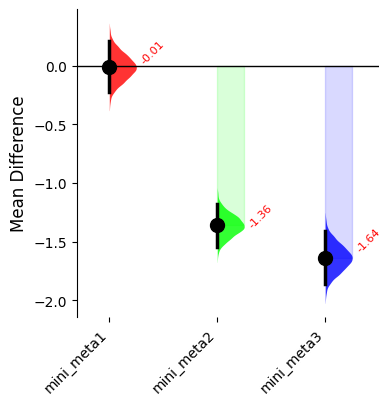

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        labels=['mini_meta1', 'mini_meta2', 'mini_meta3'],
                        custom_palette=['#FF0000', '#00FF00', '#0000FF'],
                        delta_text=True,
                        delta_text_kwargs={'color': 'red', 'offset': 0.1,
                                           'fontsize': 8, 'rotation': 45,
                                           'va': 'bottom',
                                           'x_coordinates': [1.4,2.4,3.4], 
                                           'y_coordinates': [0,-1.4,-1.6]})          

### Contrast bars
You can add/remove contrast bars via the `contrast_bars` argument. It is on by default.

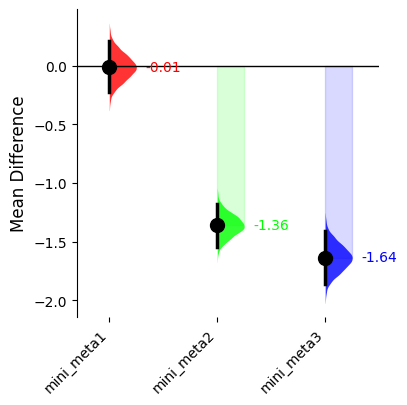

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        labels=['mini_meta1', 'mini_meta2', 'mini_meta3'],
                        custom_palette=['#FF0000', '#00FF00', '#0000FF'],
                        contrast_bars=True,)          

You can set a variety of kwargs to customize the delta text via `contrast_bars_kwargs`.

Pass any keyword arguments accepted by matplotlib.patches.Rectangle here, as a string.


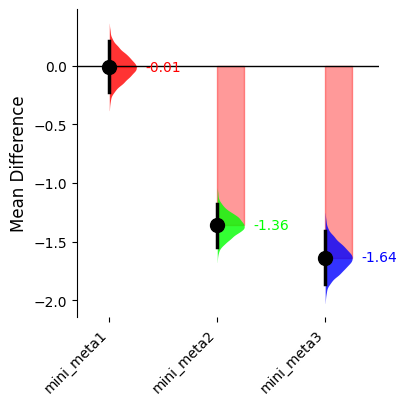

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        labels=['mini_meta1', 'mini_meta2', 'mini_meta3'],
                        custom_palette=['#FF0000', '#00FF00', '#0000FF'],
                        contrast_bars=True,
                        contrast_bars_kwargs={'color': 'red', 'alpha': 0.4})    

### Reference band
You can add reference bands by supplying a list/tuple to the `reference_band` argument, indicating the contrast to highlight. None are displayed by default.

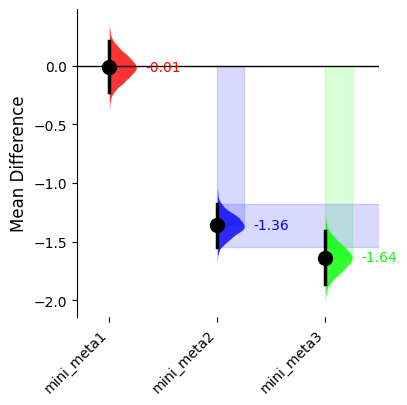

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        labels=['mini_meta1', 'mini_meta2', 'mini_meta3'],
                        custom_palette=['#FF0000', '#0000FF', '#00FF00'],
                        reference_band=[1,])    

You can set a variety of kwargs to customize the reference bands via `reference_band_kwargs`.

Pass any keyword arguments accepted by matplotlib.patches.Rectangle here, as a string.

In addition, the `span_ax` keyword argument can be used to expand the reference band across the whole plot. 


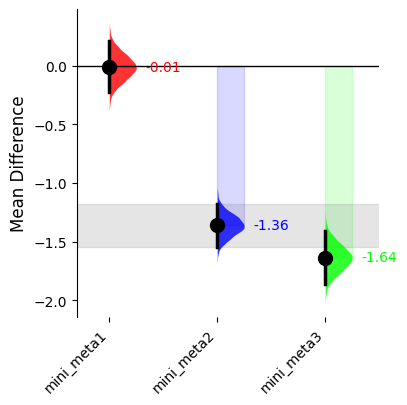

In [ ]:
f_forest_minimeta = dabest.forest_plot(
                        data = contrasts_mini_meta, 
                        labels=['mini_meta1', 'mini_meta2', 'mini_meta3'],
                        custom_palette=['#FF0000', '#0000FF', '#00FF00'],
                        reference_band=[1,],
                        reference_band_kwargs={'span_ax': True, 'color': 'grey', 'alpha': 0.2})    

### Embedding forest plots into an existing Axes 

You can plot a forest plot into an existing Axes as a subplot by using the with the ``ax`` parameter. 

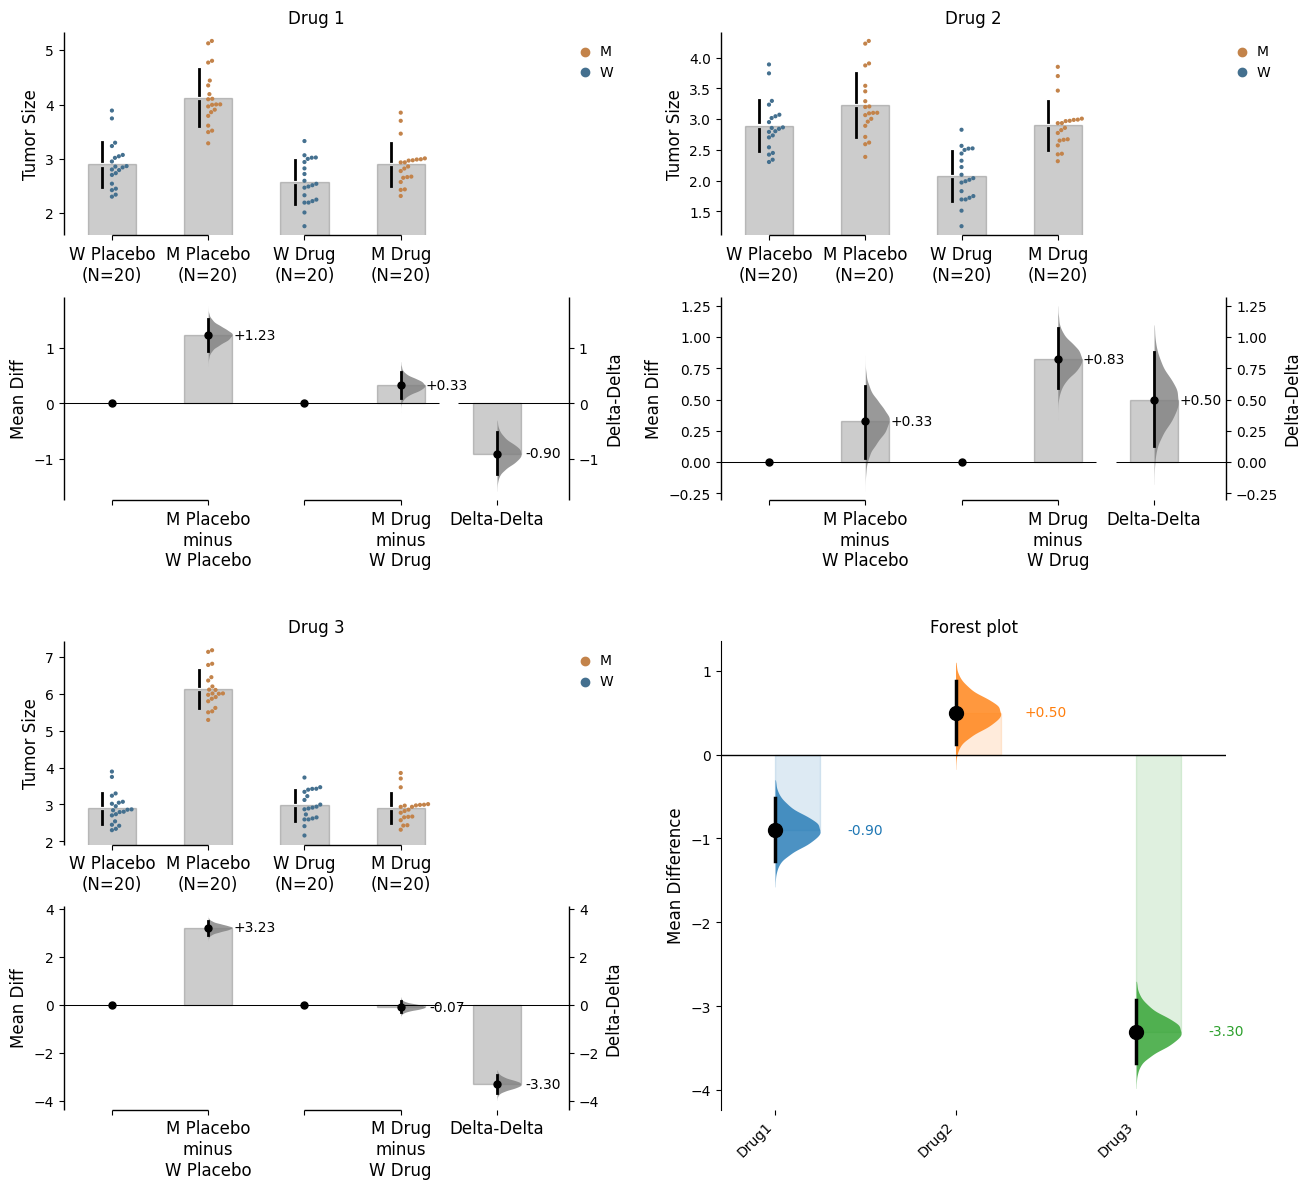

In [ ]:
f_forest_drug_profiles, axes  = plt.subplots(2, 2, figsize=[15, 14])
f_forest_drug_profiles.subplots_adjust(hspace=0.3, wspace=0.3)

for ax, contrast in zip(axes.flatten(), [unpaired_delta_01, unpaired_delta_02, unpaired_delta_03]):
    contrast.mean_diff.plot(                  
                    contrast_label='Mean Diff',
                    raw_marker_size = 1,
                    contrast_marker_size = 5,
                    color_col='Genotype',
                    ax = ax
    )

dabest.forest_plot(
    data = contrasts, 
    labels = ['Drug1', 'Drug2', 'Drug3'], 
    ax = axes[1,1], 
    )

for ax, title in zip(axes.flatten(), ['Drug 1', 'Drug 2', 'Drug 3', 'Forest plot']):
    ax.set_title(title, fontsize = 12)